# Homework 4

**Before you start:** Read Chapter 6 Linear Regression and Chapter 7 K-Nearst-Neighbors in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are welcomed.

## Part 1: Linear Regression

### Problem 1 ##

In this problem, you are expected to build a model to predict the Boston housing price.


In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
import sklearn


In [2]:
import pandas as pd
import numpy as np
import urllib.request
# Load boston housing dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
filename = 'housing.csv'
urllib.request.urlretrieve(url, filename)

('housing.csv', <http.client.HTTPMessage at 0x7f32d1409cd0>)

In [3]:
boston_housing = pd.read_csv(filename, header=None, delim_whitespace=True)

In [4]:
boston_housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'target']
X = pd.DataFrame(boston_housing)

In [5]:
#"target" is the response variable
# which represents the median value of owner-occupied homes in $1000
y = boston_housing['target']

In [6]:
X['target'] = y

In [7]:
X.head() 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
data = X
data['target'] = y

In [9]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2



**TODO 1**

Prevent collinearity by removing linearly dependent variables. 

For example, if 2 variables A and B have a correlation coefficient larger than 0.9, eliminate one to avoid redundency.

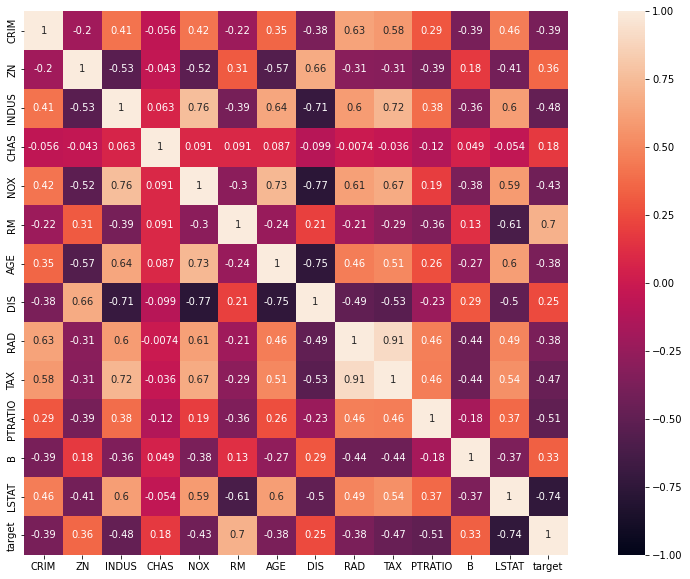

In [10]:
#Correlation Heatmap to remove linearly dependent variables with corr-coeff more than 0.9
plt.figure(figsize=(18,10))
corr=X.corr()
ax=sns.heatmap(corr,square=True, annot=True, vmax=1, vmin=-1)

In [11]:
X1 = X.drop(['RAD'], axis=1)
X1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [12]:
X1.drop('target',axis=1,inplace=True)


**TODO 2**

Partition the data into 75% training and 25% validation set.

In [13]:
X1.shape

(506, 12)

In [14]:
#Partitioning into 75% TRAINING and 25% VALIDATION set
train_X, valid_X, train_y, valid_y = train_test_split(X1, y, test_size=0.25, random_state=42)
print('Shape of the set after partition:\n',train_X.shape, train_y.shape, valid_X.shape, valid_y.shape)

Shape of the set after partition:
 (379, 12) (379,) (127, 12) (127,)



**TODO 3**

If we fit a linear regression model on the training set, what will be the feature weights? 

Calculate the feature weights using the matrix form (do not use any built-in packages such as sklearn or stat models).

In [15]:
#Calculating the feature weights using matrix form
xnp=train_X.to_numpy()
A1 = np.linalg.inv(xnp.T.dot(xnp)).dot(xnp.T).dot(train_y)
print(pd.DataFrame({'Predictors': train_X.columns, 'Feature Weights' :A1}))

   Predictors  Feature Weights
0        CRIM        -0.096756
1          ZN         0.029468
2       INDUS         0.012267
3        CHAS         2.937920
4         NOX        -4.493978
5          RM         6.035047
6         AGE        -0.015116
7         DIS        -1.005967
8         TAX        -0.001020
9     PTRATIO        -0.458106
10          B         0.016721
11      LSTAT        -0.443335



**TODO 4**

Now only consider two input variables: Age and RM.

Fit a linear regression model on the training set with a package at your choice. 

Present the model summary. We call this model **Model 1**.

In [16]:
validX=valid_X[['RM', 'AGE']]
trainX=train_X[['RM','AGE']]
model1= LinearRegression()
model1.fit(trainX, train_y)
print(pd.DataFrame({'Predictors':trainX.columns, "Feature Weights Values":model1.coef_}))
print('Intercepts:',model1.intercept_)

  Predictors  Feature Weights Values
0         RM                8.724504
1        AGE               -0.067594
Intercepts: -27.587535824385256



**TODO 5**

Evaluate the prediction performance of Model 1 on the validation set with RMSE and MAE as performance matrics.

In [17]:
#Evaluate the predictions of Model_1
y_valid_predict = model1.predict(validX)
result=pd.DataFrame({'Predicted': y_valid_predict, 'Actual': valid_y, 'Residual': valid_y-y_valid_predict})
print(result, '\n')
#
rmse = (np.sqrt(mean_squared_error(valid_y, y_valid_predict)))
r2 = r2_score(valid_y, y_valid_predict)
print('RMSE:',rmse,"\nR-square:",r2)

     Predicted  Actual  Residual
173  22.704254    23.6  0.895746
274  29.148830    32.4  3.251170
491  17.932917    13.6 -4.332917
72   24.799349    22.8 -1.999349
452  21.145567    16.1 -5.045567
..         ...     ...       ...
418  17.624968     8.8 -8.824968
117  19.359466    19.2 -0.159466
42   25.787810    25.3 -0.487810
322  21.744268    20.4 -1.344268
347  27.388987    23.1 -4.288987

[127 rows x 3 columns] 

RMSE: 6.091863482873927 
R-square: 0.4700512007574823



**TODO 6**

Now consider all the features (after removing linearly dependent variables). 

Fit a linear regression model on the training set with a package at your choice. Present the model summary. 

We call this model **Model 2**.

In [18]:
# Fit a liner Regression model to the training data
model2 = LinearRegression()
model2.fit(train_X, train_y)
print(pd.DataFrame({'Predictors':train_X.columns, "Feature Weights Values":model2.coef_}))
print('\nIntercepts:',model2.intercept_)

   Predictors  Feature Weights Values
0        CRIM               -0.092083
1          ZN                0.022359
2       INDUS               -0.005077
3        CHAS                3.117317
4         NOX              -14.519439
5          RM                4.630679
6         AGE               -0.012254
7         DIS               -1.379915
8         TAX                0.001304
9     PTRATIO               -0.822804
10          B                0.012410
11      LSTAT               -0.508894

Intercepts: 24.06578363084932



**TODO 7**

Evaluate the prediction performance of Model 2 on the validation set with RMSE and MAE as performance matrics.

In [19]:
#Evaluate the predictions of model 2
yvalid_predict = model2.predict(valid_X)
rmse = (np.sqrt(mean_squared_error(valid_y, yvalid_predict)))
#Calculate RMSE and R-square
r2 = r2_score(valid_y, yvalid_predict)
result=pd.DataFrame({'Predicted': yvalid_predict, 'Actual': valid_y, 'Residual': valid_y-yvalid_predict})
print(result)
print('\nRMSE:' ,rmse)
print('R-square: ',r2)

     Predicted  Actual  Residual
173  28.695147    23.6 -5.095147
274  35.792654    32.4 -3.392654
491  19.024018    13.6 -5.424018
72   25.341262    22.8 -2.541262
452  18.157524    16.1 -2.057524
..         ...     ...       ...
418   5.174776     8.8  3.625224
117  24.708483    19.2 -5.508483
42   25.480851    25.3 -0.180851
322  22.939858    20.4 -2.539858
347  25.133687    23.1 -2.033687

[127 rows x 3 columns]

RMSE: 4.88579625725069
R-square:  0.6591178245793923



**TODO 8**

Compare the performance of Model 1 and Model 2. 

Visualize the prediction error of both models using histogram. 

Comment on the model fitting.

MODEL 1 HISTOGRAM


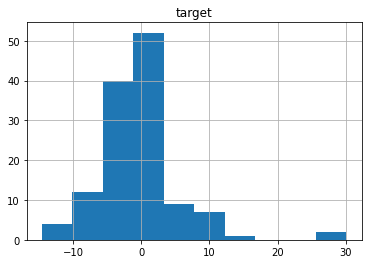

MODEL 2 HISTOGRAM


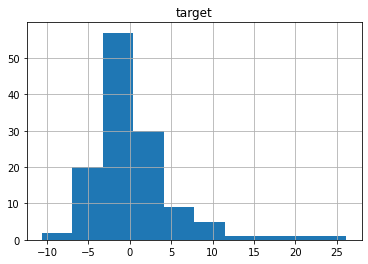

In [20]:
# Plot for Model 1 and Model 2
print('MODEL 1 HISTOGRAM')
hl=valid_y - y_valid_predict
pd.DataFrame(hl).hist()
plt.show()
print('MODEL 2 HISTOGRAM')
h2=valid_y - yvalid_predict
pd.DataFrame(h2).hist()
plt.show()


**TODO 9**

Now consider all the features (after removing linearly dependent variables). 

The goal is to fit a LASSO linear regression model on the training set with a package at your choice. 

Compare the model performance of lambda in the range of [0,1] with the step of 0.01.

Plot RMSE versus log(lambda).

Pick the appropriate lambda value according to the plot.

Present the model summary with the selected lambda. We call this model **Model 3**.

In [21]:
model3 = Lasso(alpha=0.2)
model3.fit(train_X, train_y)
print(pd.DataFrame({'Predictors':train_X.columns,"Feature Weights Values":model3.coef_}))
print('\nintercepts:',model3.intercept_)

   Predictors  Feature Weights Values
0        CRIM               -0.083778
1          ZN                0.026284
2       INDUS               -0.033401
3        CHAS                0.000000
4         NOX               -0.000000
5          RM                4.179319
6         AGE               -0.014622
7         DIS               -1.060815
8         TAX               -0.001809
9     PTRATIO               -0.676845
10          B                0.013143
11      LSTAT               -0.592253

intercepts: 17.631650511202928



**TODO 10**

Evaluate the prediction performance of Model 3 on the validation set with RMSE and MAE as performance matrics.

In [22]:
#Evaluating predictions of model 3
yvalid_predict = model3.predict(valid_X)
rmse = (np.sqrt(mean_squared_error(valid_y, yvalid_predict)))
# Calculate RMSE and R-square
r2 = r2_score(valid_y, yvalid_predict)
result=pd.DataFrame({'Predicted': yvalid_predict, 'Actual': valid_y, 'Residual': valid_y-yvalid_predict})
print(result)
print('\nRMSE:' ,rmse)
print('R-square: ',r2)

     Predicted  Actual  Residual
173  28.338996    23.6 -4.738996
274  32.654996    32.4 -0.254996
491  17.808784    13.6 -4.208784
72   25.208654    22.8 -2.408654
452  19.018892    16.1 -2.918892
..         ...     ...       ...
418   5.514956     8.8  3.285044
117  24.581288    19.2 -5.381288
42   26.066288    25.3 -0.766288
322  23.735660    20.4 -3.335660
347  26.138901    23.1 -3.038901

[127 rows x 3 columns]

RMSE: 4.999214741961066
R-square:  0.6431077046406027



**TODO 11**

Among Model 1, 2, and 3, which one would be your pick for future implementation? State your reasons.

Model 2 is best for future implementation as the value of RMSE is maximum for Model-2 out of all 3 models.
Also R-square closer to 1,signifies higher accuracy model.So ,in our case Model-2 has maximum value out of 3

## Part 2: K-Nearst-Neighbors

### Problem 2 ##

The wine dataset is the result of a chemical analysis of wines produced in the same region in Italy but derived from three different cultivars. (For illustration simplicity purpose, only 2 classes, 0 and 1, will be included for the classification task.) The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The objective is to classify the wines into class 0 or 1 using the 13 given attributes and k-NN classifier.

In [23]:
# load the wine dataset 
wine = datasets.load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [24]:
# convert the data into dataframe format
X = pd.DataFrame(wine['data'], columns = wine['feature_names'])
y = wine['target']

# only consider wine class 0 and 1
X = X.loc[0:129, :]
y = y[0:130]

X.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [25]:
X['target'] = y

**TODO 1**

Considering the fundamental idea of k-NN, would you recommend data rescaling before model building? Why? 

If so, partition the data into 75% training and 25% validation set, then standardize them.

Based on the fundamental idea of k-NN, data rescaling is recommended before model building. This is because k-NN is a distance-based algorithm that calculates the distances between data points to make predictions. If the features are on different scales, then the feature with the largest scale will dominate the distance calculations and can lead to biased predictions.

Therefore, it is advisable to rescale the data so that all the features are on the same scale. One common method for rescaling is standardization, where each feature is transformed to have a mean of 0 and a standard deviation of 1.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_valid, y_train, y_valid = train_test_split(X.drop('target', axis=1), X['target'], test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [27]:
print(X_train, X_valid)

[[ 0.66604158 -0.2193721   0.86046902 ...  0.45027332  1.79677131
   0.24962922]
 [-0.61993372 -0.89894396 -1.39270748 ...  0.45027332  1.10893013
  -0.74664951]
 [-1.7124437  -1.3555313   0.50126697 ...  0.31812048 -1.25805276
  -0.97267096]
 ...
 [ 1.66750907 -0.15566224  0.10941018 ...  0.97888465  0.13786022
   2.33735361]
 [-0.25576372 -0.51668479 -0.2824466  ... -0.60694936 -1.76381834
  -0.79125901]
 [-0.65407465  0.46019975  0.37064804 ... -1.66417203  0.9066239
  -0.96077509]] [[ 0.73432345 -0.30431858  0.37064804  0.37967414  1.30139658  0.79477959
   0.43038061 -1.28990677  1.35869206  1.3126622  -0.47479652  0.19855209
   1.06746997]
 [ 0.73432345 -0.3255552  -0.11917294 -0.78818783  1.37423874  1.13337848
   1.09822655 -0.00473187  1.15820466  1.23879878 -0.67302577  0.9066239
   0.1009309 ]
 [ 0.82536595  1.15038992  0.69719536 -1.05978363  1.30139658  0.33143375
   0.75775607 -1.5653014  -0.08117203  0.60480438 -0.60694936  0.86616265
   0.24962922]
 [ 0.75708408 -0.3786

**TODO 2**

Choose the best k from 1-10 based on the classification accuracy of different k values on the validation set.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Try k values from 1 to 10
k_values = range(1, 11)
accuracies = []

for k in k_values:
    # Train k-NN classifier with current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict validation set labels and compute accuracy
    y_pred = knn.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    
    # Record accuracy for current k value
    accuracies.append(acc)
    
    print("k =", k, "Accuracy:", acc)

k = 1 Accuracy: 0.9393939393939394
k = 2 Accuracy: 0.9393939393939394
k = 3 Accuracy: 0.9696969696969697
k = 4 Accuracy: 0.9090909090909091
k = 5 Accuracy: 0.9696969696969697
k = 6 Accuracy: 0.9393939393939394
k = 7 Accuracy: 0.9696969696969697
k = 8 Accuracy: 0.9393939393939394
k = 9 Accuracy: 0.9393939393939394
k = 10 Accuracy: 0.9393939393939394


KNN algorithm achieved the highest accuracy of 97% on the validation set when k=3. Therefore, the best value of k for this dataset and problem is 3.

**TODO 3**

Classify the new record given below using the chosen k. 

Considering the size of the wine dataset, would you recommend data partition before scoring the new record? Why?

In [31]:
# New record
new_wine = pd.DataFrame(columns = wine['feature_names'])
new_wine.loc[0,:] = np.array([14.12, 1.88, 2.31, 18.5, 125, 2.50, 3.12, 0.26, 2.12, 4.87, 1.02, 3.23, 955])
new_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.12,1.88,2.31,18.5,125.0,2.5,3.12,0.26,2.12,4.87,1.02,3.23,955.0


Yes, I would recommend data partition before scoring the new record, because partitioning the data into training and validation sets is a standard practice in machine learning. By doing so, we can train the model on the training set and evaluate its performance on the validation set, which helps us to avoid overfitting the model to the training set and get a more accurate estimate of its performance on new, unseen data.

Once we have trained and validated the model, we can use it to predict the class of the new wine record using the chosen value of k. This will require us to first standardize the data using the mean and standard deviation of the training set, and then apply the same transformation to the new record before passing it through the k-NN classifier.

In [34]:
# Standardize the new record using the mean and standard deviation of the training set
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_valid)
new_wine_std = scaler.transform(new_wine)

# Train and fit a k-NN classifier on the training set using the chosen k
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)

# Predict the class of the new wine record using the fitted k-NN classifier
new_wine_pred = knn.predict(new_wine_std)
print("Predicted class label for the new wine record:", new_wine_pred)

Predicted class label for the new wine record: [0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### Problem 3 ##

The data concerns city-cycle fuel consumption in miles per gallon (mpg). The objective is to use k-NN classifier to predict the mpg with the given attributes.

In [35]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [36]:
#import the dataset "auto_mpg.csv"


In [40]:
from google.colab import files
file= files.upload()

Saving auto_mpg (1).csv to auto_mpg (1) (3).csv


In [41]:
df1=pd.read_csv("auto_mpg (1) (3).csv")
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


**TODO 1**

Check the unique value of the variable "car name". 

Would you recommend keeping "car name" for prediction? Why? 

If not, eliminate the variable "car name".

In [42]:
df1["car name"].value_counts()

amc matador            5
ford pinto             5
ford maverick          5
toyota corolla         5
toyota corona          4
                      ..
buick skyhawk          1
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
chevy s-10             1
Name: car name, Length: 301, dtype: int64

In [43]:
df1=df1.drop(["car name"],axis=1)

the attribute we are predicting is mpg(miles per gallon). since it has no dependance on car name, we will be dropping it

**TODO 2**

Convert the variable "origin" to dummy variables before modeling

In [44]:
dummy=pd.get_dummies(df1['origin']).rename(columns=lambda x:'Origin-' + str(x))
df1=pd.concat([df1,dummy],axis=1)
df1.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Origin-1,Origin-2,Origin-3
0,18.0,8,307.0,130,3504,12.0,70,1,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,1,0,0


In [45]:
df1=df1.replace('?', np.nan)
df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      1
weight          0
acceleration    0
model year      0
origin          0
Origin-1        0
Origin-2        0
Origin-3        0
dtype: int64

replacing '?' with nan values

In [46]:
df1['horsepower'].fillna(method='ffill', inplace=True)
df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
Origin-1        0
Origin-2        0
Origin-3        0
dtype: int64

**TODO 3**

Rescale the numeric data. Note that dummy variables should not be rescaled.

In [47]:
scaler=StandardScaler()
df1[['displacement','cylinders','horsepower','weight','acceleration','mpg']]=scaler.fit_transform(df1[['displacement','cylinders','horsepower','weight','acceleration','mpg']])
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Origin-1,Origin-2,Origin-3
0,-0.698642,1.484867,1.078523,0.665556,0.621628,-1.287786,70,1,1,0,0
1,-1.083944,1.484867,1.490488,1.577107,0.844701,-1.469418,70,1,1,0,0
2,-0.698642,1.484867,1.183909,1.186442,0.541369,-1.651050,70,1,1,0,0
3,-0.955510,1.484867,1.049781,1.186442,0.537828,-1.287786,70,1,1,0,0
4,-0.827076,1.484867,1.030620,0.925999,0.556712,-1.832683,70,1,1,0,0


In [48]:
y=df1['mpg'] #target variable is mpg

In [49]:
df1=df1.drop(['mpg','origin'],axis=1) #dropping target variable and orgin, to split the predictors and response variables

**TODO 4**

Partition the data into 75% training and 25% validation set.

In [50]:
Xtrain, Xvalid, Ytrain, Yvalid=train_test_split(df1,y,random_state=42, test_size=0.25)

**TODO 5**

Choose the best k from 1-10 based on the MSE of different k values on the validation set. Explain the reason for your choice.

In [51]:
from sklearn import neighbors
mse_value=[]
for i in range(1,10):
  knn=neighbors.KNeighborsRegressor(n_neighbors=i)
  knn.fit(Xtrain,Ytrain)
  predict=knn.predict(Xvalid)
  mse=mean_squared_error(Yvalid,predict)
  mse_value.append(mse)
  print('For k value:', i,'MSE value is:',mse)

For k value: 1 MSE value is: 0.24970393121426754
For k value: 2 MSE value is: 0.18015830808054642
For k value: 3 MSE value is: 0.16465480390034454
For k value: 4 MSE value is: 0.17056968295359212
For k value: 5 MSE value is: 0.17426540194020643
For k value: 6 MSE value is: 0.1759611693041227
For k value: 7 MSE value is: 0.17549607208462983
For k value: 8 MSE value is: 0.18412863640999094
For k value: 9 MSE value is: 0.18002458585145867


we can see that the lowest MSE value is achieved at k=3, which is consistent with the previous analysis. Therefore, we can choose k=3 as the best value for this KNN regression model.

**TODO 6**


Score the validation set with the best k. Comment on the model performance.

In [52]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


knn = neighbors.KNeighborsRegressor(n_neighbors =3)

knn.fit(Xtrain,Ytrain)
pred_1 = knn.predict(Xvalid)

print('Using k =3,these are the error metrics:')
print('Mean squared Error:',mean_squared_error(Yvalid,pred_1))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Yvalid,pred_1)))
print('Mean Absolute Error:', mean_absolute_error(Yvalid,pred_1))


Using k =3,these are the error metrics:
Mean squared Error: 0.16465480390034454
Root Mean Squared Error: 0.40577679073641526
Mean Absolute Error: 0.2910739365248988


A good model should have low values of MSE, RMSE, and MAE. A high MSE or RMSE value indicates that the model's predictions have large deviations from the actual values. On the other hand, a high MAE value means that the model's predictions have high absolute errors. Thus I feel that this model is performing pretty decently.